In [1]:
import numpy as np
import pickle as pkl
import pandas as pd
import os

In [2]:
os.chdir('../../../..')
print(os.getcwd())

c:\Users\Paul\Documents\X\4A\S1\HMM\poisson_network_models


In [3]:
# retrieve filenames
directory = 'data/compare_strat/'
compare_strat_filenames = os.listdir(directory)
results = {}

# iterate over filenames
for filename in compare_strat_filenames:
    # get results
    _name,strat,_ = filename.split('_')
    content = pkl.load(open(directory + filename, 'rb'))
    strat = int(strat)

    # save results
    if strat not in results:
        results[strat] = []
    results[strat].append(content)

# save results
pkl.dump(results, open('data/compare_strat_results.pkl', 'wb'))

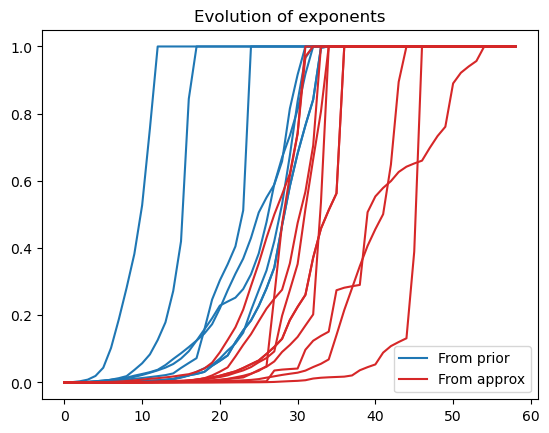

In [4]:
import matplotlib.pyplot as plt

# Strat 2
simu_len = [len(simu.shared["exponents"]) for simu in results[2]]+[len(simu.shared["exponents"]) for simu in results[3]]
simu_len = [l for l in simu_len if l < 200]
max_len = max(simu_len)

for simu in results[2]:
    if len(simu.shared["exponents"]) < max_len:
        simu.shared["exponents"].extend([1] * (max_len - len(simu.shared["exponents"])))
        plt.plot(simu.shared["exponents"], c='tab:blue')
plt.plot(simu.shared["exponents"], c='tab:blue', label='From prior')

# Strat 3
exponents_lengths_3 = [len(simu.shared["exponents"]) for simu in results[3]]
max_len_3 = max(exponents_lengths_3)

for simu in results[3]:
    if len(simu.shared["exponents"]) < max_len:
        simu.shared["exponents"].extend([1] * (max_len - len(simu.shared["exponents"])))
        plt.plot(simu.shared["exponents"], c='tab:red')
plt.plot(simu.shared["exponents"], c='tab:red', label='From approx')

plt.legend()
plt.title('Evolution of exponents')
plt.show()